In [37]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from data import *
from train import *
from networks import *
from visualisation import *
from train_clust import *
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cuml import TSNE
torch.set_default_dtype(torch.float64)
#device = torch.device('cuda')
dataset = H5SeismicDataset(
    filepath="/datasets/ee228-sp21-A00-public/RIS_Seismic-001.h5",
    transform = transforms.Compose(
        [SpecgramShaper(), SpecgramToTensor()]
    )
)
#dataset[0]
dataloaders = getDataloaderSplit(dataset, 0.2,0.1)
#DEC_loader_train = DataLoader(dataset, sampler=samplers[0],**params)
#DEC_loader_valid = DataLoader(dataset, sampler=samplers[1],**params)
#DEC_loader_test = DataLoader(dataset, sampler=samplers[2],**params)
#model = get_model()
#outputs = train(dataloader,model)
#getGraphs(outputs) #This will save graphs to a folder

In [27]:
#Use a saved model
USE_SAVED=False
if USE_SAVED:
    PATH='./saved_models/AEC/state_dict_AEC.pt'
    PATH1='./saved_models/AEC/test_lr001_epochs10.pt'

    #model = AEC()
    #model.load_state_dict(torch.load(PATH))
    model = torch.load(PATH1)
    model.eval()
    #clustTrain(model,dataloaders)
else:
    device = torch.device('cuda')
    model = AEC()
    model.to(device)
    params={'lr':.001,'epochs':10,}
    outputs = pretrain(model= model,dataloaders=dataloaders,device=device,lr=params['lr'], epochs=params['epochs'], absoluteLossThresh = 0.0032)

epoch:   0  train loss:  tensor(0.0749)
epoch:   0  train loss:  tensor(0.0114)
epoch:   0  train loss:  tensor(0.0056)
epoch:   0  train loss:  tensor(0.0049)
epoch:   0  train loss:  tensor(0.0046)
epoch:   0  train loss:  tensor(0.0045)
epoch:   0  val loss:  tensor(0.0043)
epoch:   0  val loss:  tensor(0.0045)
epoch:   0  val loss:  tensor(0.0045)

train loss tensor(0.0090) val_loss  tensor(0.0043)

epoch:   1  train loss:  tensor(0.0040)
epoch:   1  train loss:  tensor(0.0040)
epoch:   1  train loss:  tensor(0.0038)
epoch:   1  train loss:  tensor(0.0041)
epoch:   1  train loss:  tensor(0.0038)
epoch:   1  train loss:  tensor(0.0040)
epoch:   1  val loss:  tensor(0.0039)
epoch:   1  val loss:  tensor(0.0039)
epoch:   1  val loss:  tensor(0.0038)

train loss tensor(0.0040) val_loss  tensor(0.0039)

epoch:   2  train loss:  tensor(0.0038)
epoch:   2  train loss:  tensor(0.0039)
epoch:   2  train loss:  tensor(0.0038)
epoch:   2  train loss:  tensor(0.0038)
epoch:   2  train loss:  t

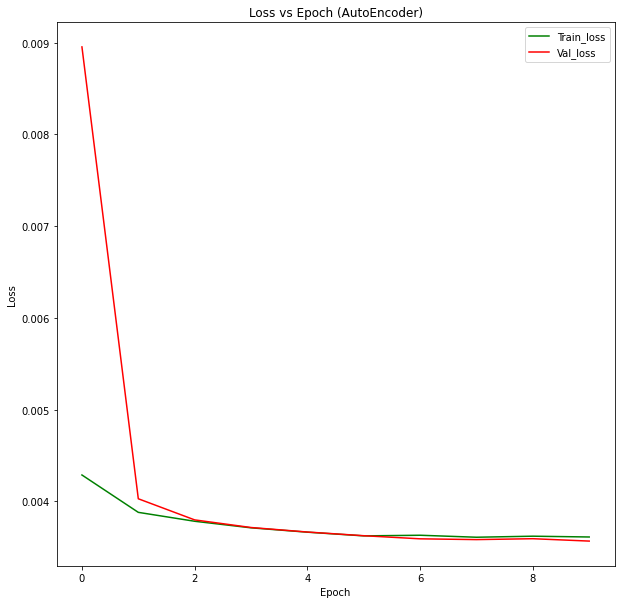

In [28]:
get_graphs(outputs[0],outputs[1],'./saved_models/AEC/test_fig')

In [29]:
z_array = getLatentFeatureSpaceDataset(model, dataloaders[2], double=True)

In [30]:
#model = AEC()
#model.load_state_dict(torch.load(PATH))
#device = torch.device('cuda')
model.to(torch.device('cpu'))
model = clustTrain(model,latentSpaceArray=z_array)
#a total of 580 indexes is expected

start training GMM
finished training GMM


In [31]:
labels = model.gmm.predict(z_array)

In [35]:
tsne_Z = tsne(z_array)

Running t-SNE...complete.


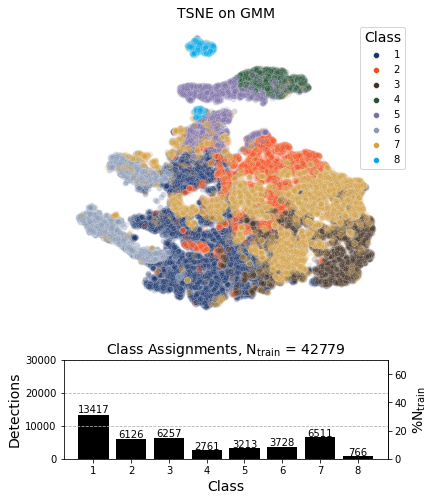

In [38]:
out = view_TSNE(tsne_Z,labels,"TSNE on GMM",True)

In [41]:
PATH='./saved_models/AEC/state_dict_AEC2.pt'
torch.save(model.state_dict(), PATH)